<a href="https://colab.research.google.com/github/HwangHanJae/Dacon_airline_classification/blob/main/airline_eda_classification_lightgbm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.display import set_matplotlib_formats

plt.style.use("ggplot")
warnings.filterwarnings("ignore")

# 데이터 로드

컬럼 설명
- id : 샘플 아이디
- Gender : 성별
- Customer Type : Disloyal 또는 Loyal 고객
- Age : 나이
- Type of Travel : Business 또는 Personal Travel
- Class : 등급
- Flight Distance : 비행 거리
- Seat comfort : 좌석 만족도
- Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
- Food and drink : 식음료 만족도
- Gate location : 게이트 위치 만족도
- Inflight wifi service : 기내 와이파이 서비스 만족도
- Inflight entertainment : 기내 엔터테인먼트 만족도
- Online support : 온라인 지원 만족도
- Ease of Online booking : 온라인 예매 편리성 만족도
- On-board service : 탑승 서비스 만족도
- Leg room service : Leg room 서비스 만족도
- Baggage handling : 수하물 처리 만족도
- Checkin service : 체크인 서비스 만족도
- Cleanliness : 청결도 만족도
- Online boarding : 온라인보딩 만족도
- Departure Delay in Minutes : 출발 지연 시간
- Arrival Delay in Minutes : 도착 지연 시간
- target : 만족 여부


In [2]:
train_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/airline_dataset/train.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/airline_dataset/test.csv"
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/airline_dataset/sample_submission.csv"

df = pd.read_csv(train_path)
test = pd.read_csv(test_path)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

데이터세트의 정보를 확인해보면 3000개의 데이터 중 Null값은 없고  
Gender, Customer Type, Type of Travel, Class 4개의 컬럼만 object 타입으로 나머지 데이터는 숫자 타입인것을 알 수 있습니다.

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2000 non-null   int64  
 1   Gender                             2000 non-null   object 
 2   Customer Type                      2000 non-null   object 
 3   Age                                2000 non-null   int64  
 4   Type of Travel                     2000 non-null   object 
 5   Class                              2000 non-null   object 
 6   Flight Distance                    2000 non-null   int64  
 7   Seat comfort                       2000 non-null   int64  
 8   Departure/Arrival time convenient  2000 non-null   int64  
 9   Food and drink                     2000 non-null   int64  
 10  Gate location                      2000 non-null   int64  
 11  Inflight wifi service              2000 non-null   int64

예측을 할 test 데이터에도 Null 값은 없습니다.

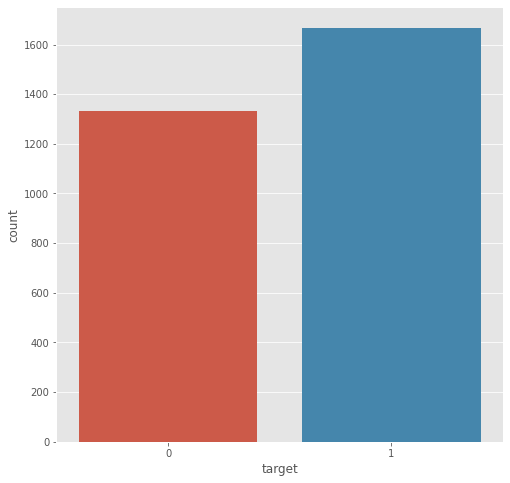

In [5]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='target')
plt.show()

In [6]:
print(df['target'].value_counts())
print()
print("1(만족)의 비율 : {:.3f}".format(df.loc[df['target'] == 1,'target'].count() / df['target'].shape[0]))
print("0(불만족)의 비율 : {:.3f}".format(df.loc[df['target'] == 0,'target'].count() / df['target'].shape[0]))

1    1668
0    1332
Name: target, dtype: int64

1(만족)의 비율 : 0.556
0(불만족)의 비율 : 0.444


target의 분포를 확인해보면 총 3000개의 데이터중 1(만족)은 1668개로 55.6%를 차지하고 있고,   
0(불만족)은 1332개로 44.4%를 차지하며 만족한 고객이 조금더 많은것으로 보입니다.

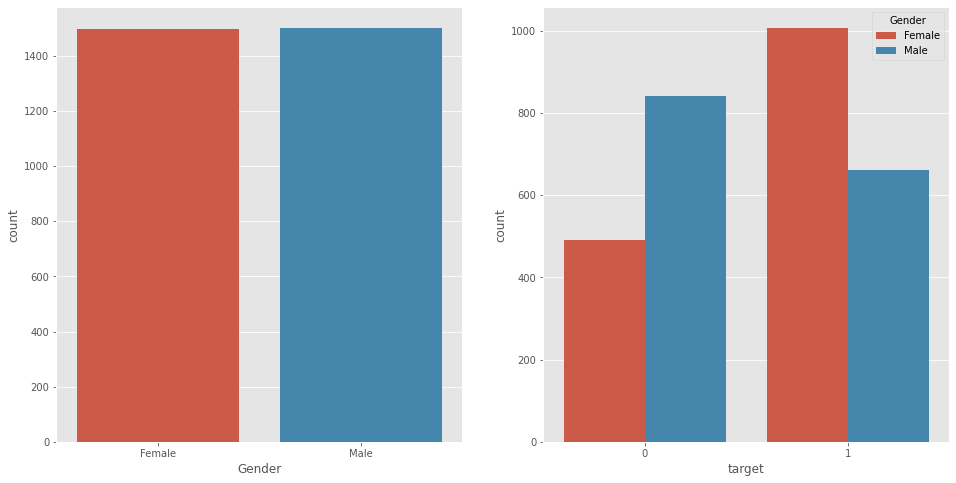

In [7]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Gender", ax=ax[0])
sns.countplot(data=df, x='target', hue='Gender', ax=ax[1])
plt.show()

전체적인 Gender 분포는 비슷해보이지만 target별 Gender의 분포는 조금 달라보입니다.
0(불만족)일때는 남성의 수가 여성보다 높고, 1(만족)의 경우에는 여성의 수가 더 높아 보입니다.

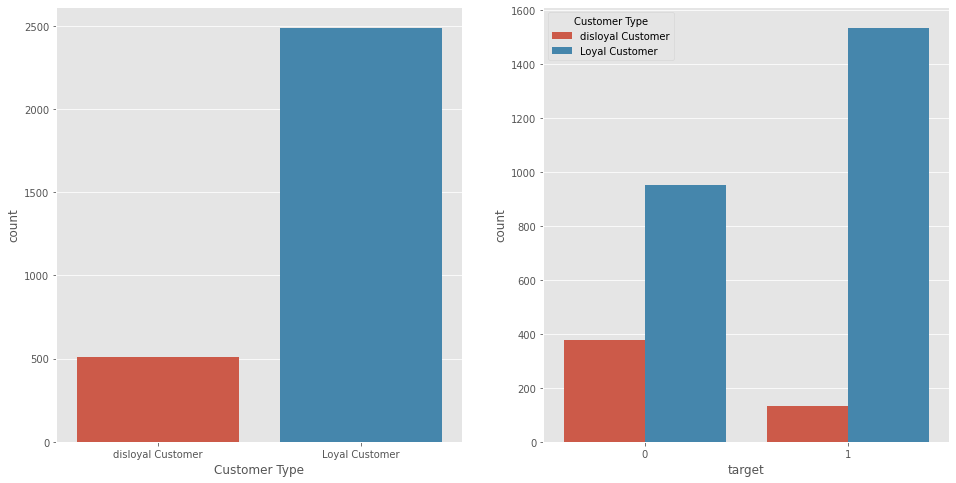

In [8]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Customer Type", ax=ax[0])
sns.countplot(data=df, x='target', hue='Customer Type', ax=ax[1])
plt.show()

전체적인 Customer Type은 Loyal Customer의 수가 disloyal Customer의 수보다 훨씬 많기 때문에,  
Customer Type별 target의 분포를 확인해보면 1(만족), 0(불만족) 둘다 Loyal Customer의 수가 더 많지만  
0(불만족)일때 disloyal Customer의 수가 1(만족)보다 많은것으로 보입니다.  

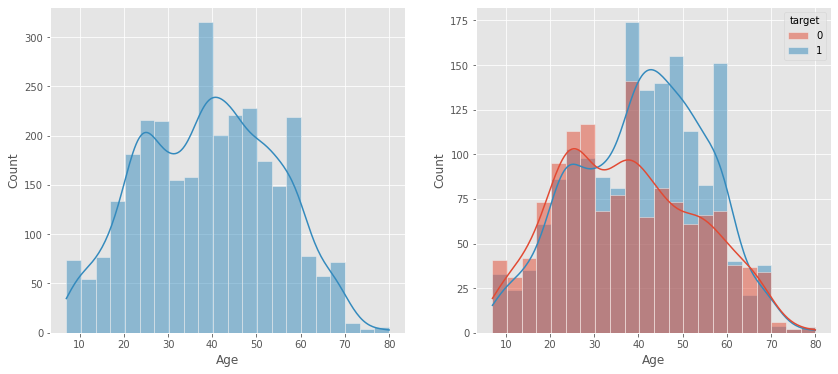

In [9]:
f, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(data=df, x= "Age", kde= True, ax = ax[0])
sns.histplot(data=df, x= "Age", hue="target", kde= True, ax = ax[1])
plt.show()

Age의 분포를 확인해보면 쌍봉의 형태를 보입니다.  
40대의 비율이 가장 높고, 20 ~ 30, 40 ~ 50대, 60대의 비율이 높아보이며 30~40대에서 낮아져 쌍봉을 띄웁니다.  

target별 Age의 분포를 확인해보면 40대이후에 1(만족)의 비율이 높아지는 것으로 보입니다.

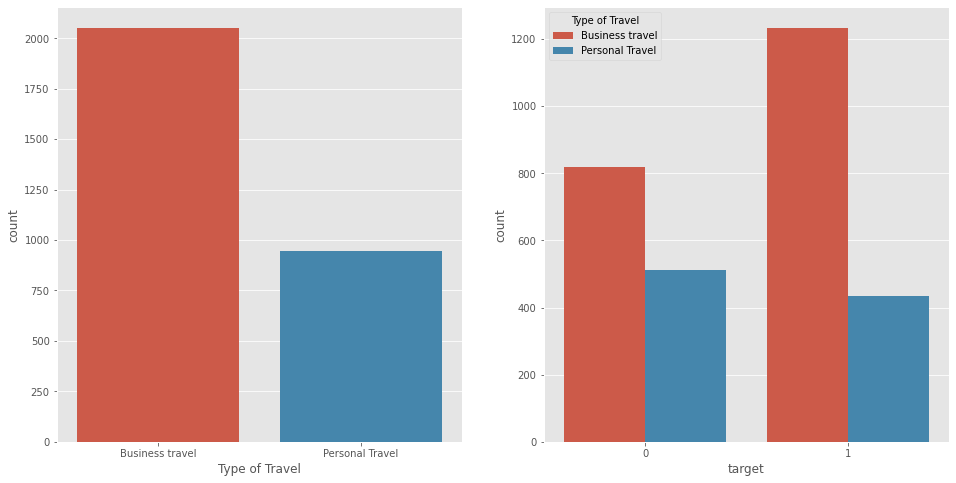

In [10]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Type of Travel", ax=ax[0])
sns.countplot(data=df, x='target', hue='Type of Travel', ax=ax[1])
plt.show()

Type of Travel 분포를 확인해보면  
Business travel의 수가 더 높고,  
target 별 Type of Travel을 확인해보아도 Business travel의 수가 더 높습니다.

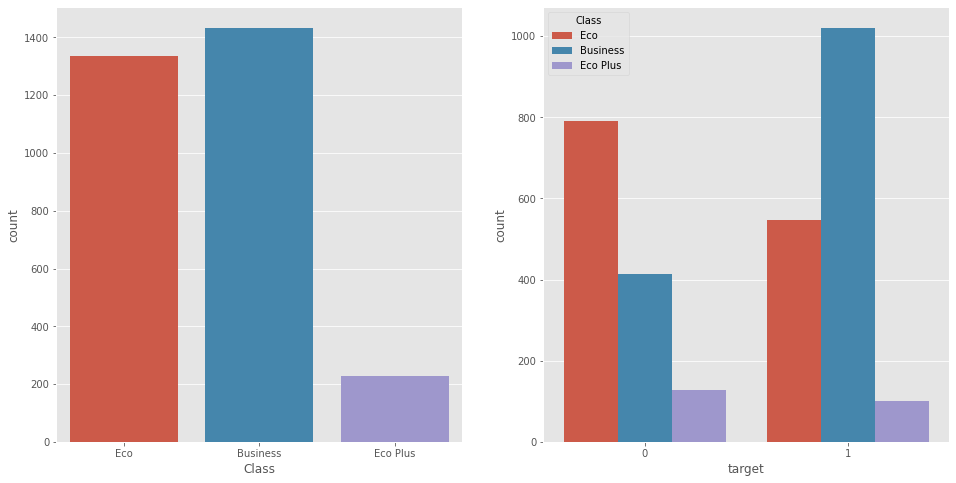

In [11]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Class", ax=ax[0])
sns.countplot(data=df, x='target', hue='Class', ax=ax[1])
plt.show()

Class를 확인해보면 Business > Eco > Eco Plus 이며,  
target별로 확인해보면 0(불만족)일때 Eco > Business > Eco Plus 순으로 0(불만족)이 높게 나타나며  
1(만족)일때는 Business > Eco > Eco Plus 순으로 나타납니다.

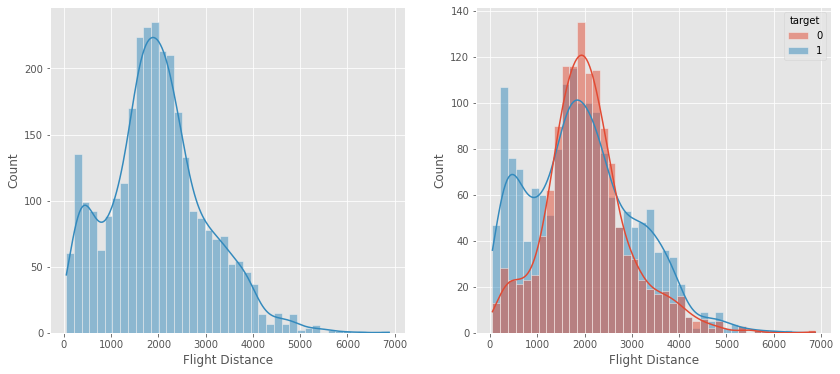

In [12]:
f, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(data=df, x= "Flight Distance", kde= True, ax = ax[0])
sns.histplot(data=df, x= "Flight Distance", hue="target", kde= True, ax = ax[1])
plt.show()

Flight Distance를 확인해보면 약 1500 ~ 2500의 수가 가장 많으며 거리가 멀어질수록 수가 줄어드는 것을 볼 수 있습니다.  
target별 Flight Distance를 확인해보면 1(만족)이 0 ~ 1000, 3000 ~ 4000 정도의 값에서 0(불만족)보다 더 높은 것으로 나타났습니다.  
1500 ~ 2500의 수에서 역시 0(불만족)이 1(만족) 조금 더 높게 나타났습니다.

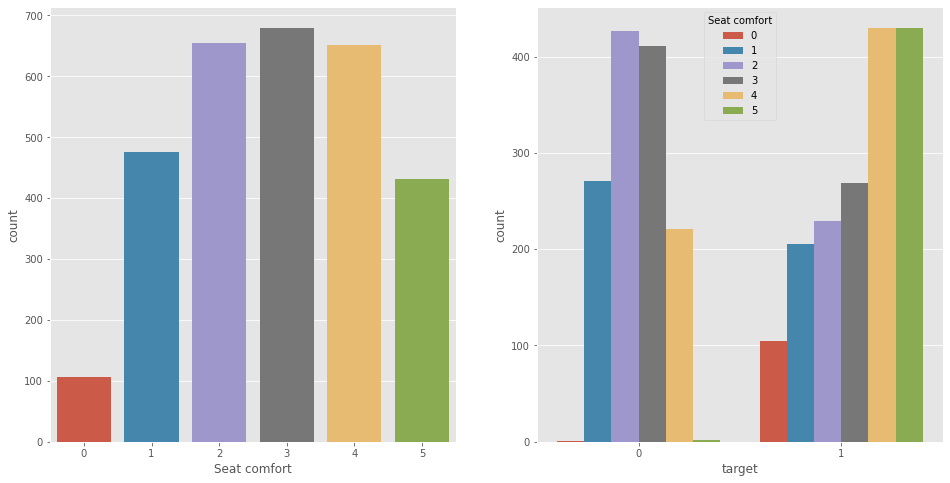

In [13]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Seat comfort", ax=ax[0])
sns.countplot(data=df, x='target', hue='Seat comfort', ax=ax[1])
plt.show()

Seat comfort의 전체 만족도는 3 > 2 > 4 > 1 > 5 > 0 순으로 보통정도의 만족도를 보이고,  
target별 만족도를 보았을 때 1(만족)에서 5,4의 비율이 높은것으로 나타나며, 최하를 나타내는 0또한 1(만족)에서 더 높은것으로 나타났습니다..  
0(불만족)에서는 3,4 정도의 보통을 나타내는 만족도가 가장 높고 그 다음은 2의 만족도가 높은 것으로 나타났습니다.  

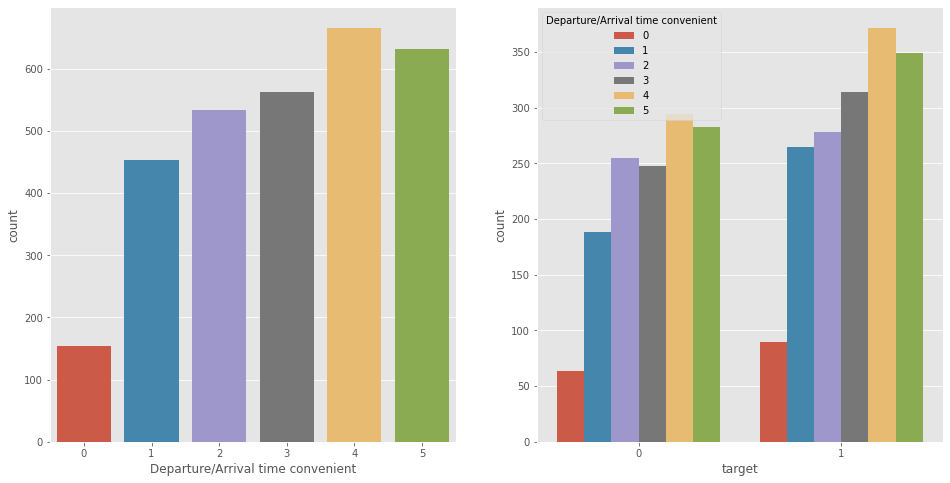

In [14]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Departure/Arrival time convenient", ax=ax[0])
sns.countplot(data=df, x='target', hue='Departure/Arrival time convenient', ax=ax[1])
plt.show()

Departure/Arrival time convenient의 전체 만족도는 4 > 5 > 3 > 2 > 1 > 0 순으로 나타나며,  
1(만족)과 0(불만족)에서 비슷하게 나타나지만 0(불만족)에서 2의 만족도가 3의 만족도 보다 조금 더 높게 나타났습니다.

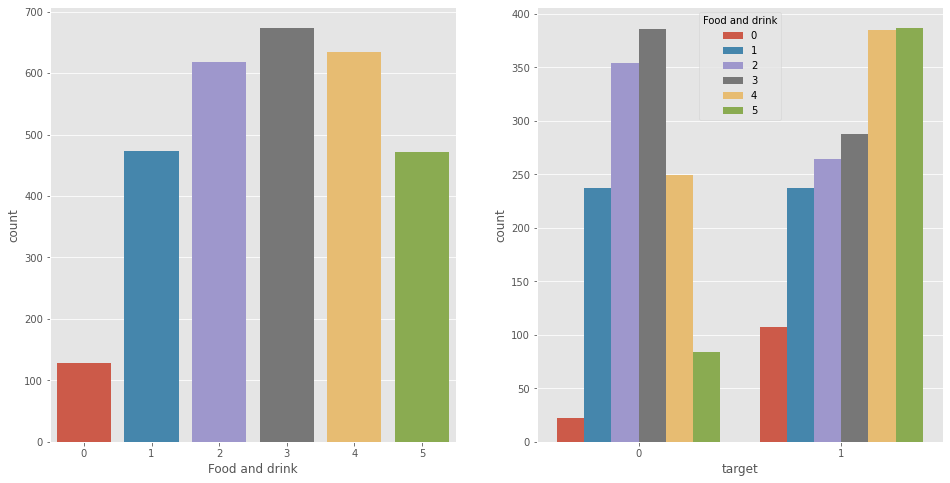

In [15]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Food and drink", ax=ax[0])
sns.countplot(data=df, x='target', hue='Food and drink', ax=ax[1])
plt.show()

Food and drink의 만족도는 Seat comfort 만족도와 비슷한 모습을 보입니다. 

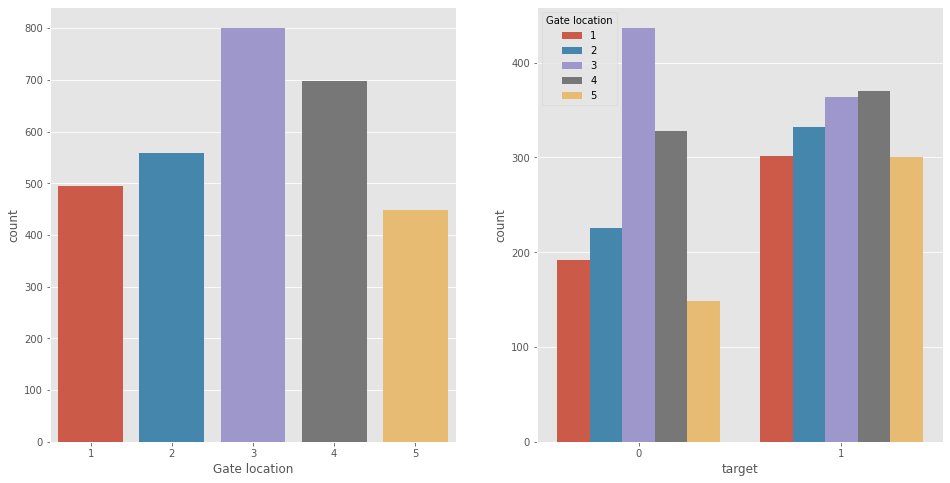

In [16]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Gate location", ax=ax[0])
sns.countplot(data=df, x='target', hue='Gate location', ax=ax[1])
plt.show()

Gate location를 확인해보면 3 > 4 > 2 > 1 > 5 순으로 5일때의 만족이 가장 낮습니다.  
하지만 target별로 확인해보았을때 1(만족)에서 5의 만족도가 비교적 높게 나타났으며, 1의 만족도 또한 높게 나타났습니다.  
0(불만족)에서는 3만족도 수준의 값이 가장 높게 나타났습니다.  

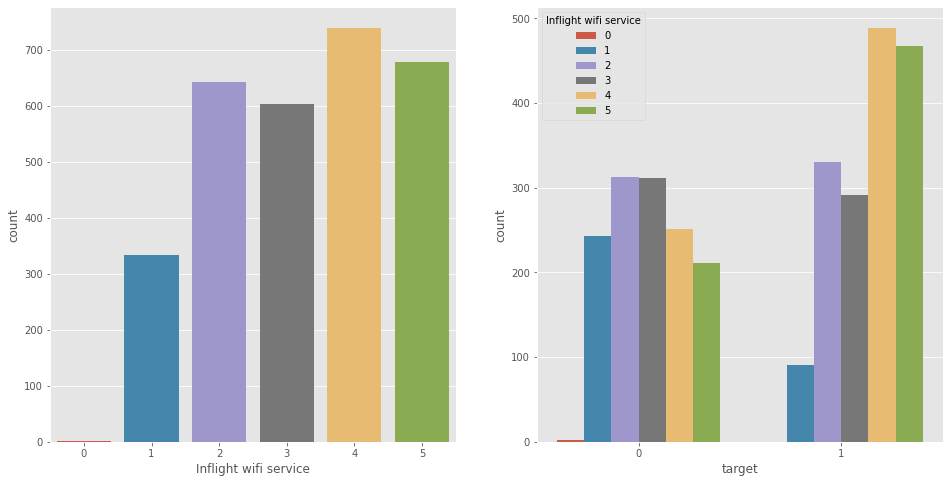

In [17]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Inflight wifi service", ax=ax[0])
sns.countplot(data=df, x='target', hue='Inflight wifi service', ax=ax[1])
plt.show()

Inflight wifi service 는 4 > 5 > 2 > 3 > 1> 0 으로 순으로 나타났고,  
target별로 보았을때 1(만족)에서는 4, 5의 수가 많습니다.  

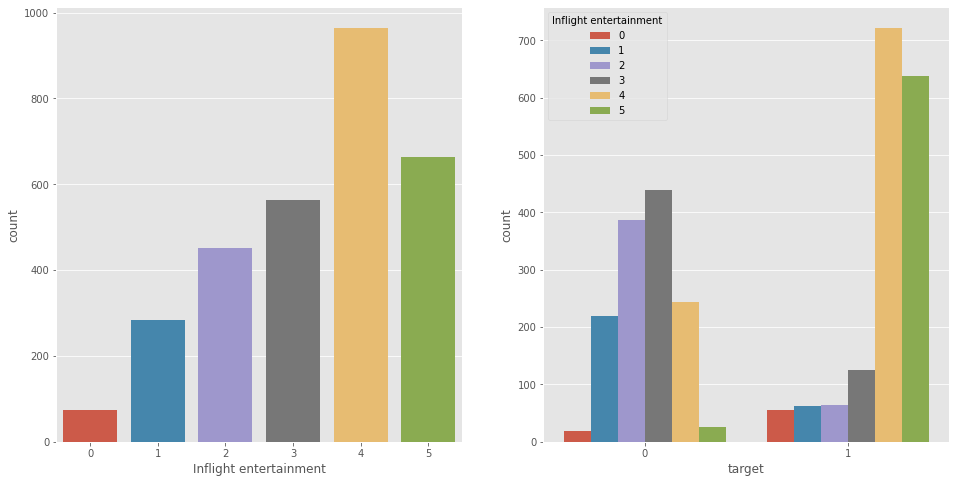

In [18]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Inflight entertainment", ax=ax[0])
sns.countplot(data=df, x='target', hue='Inflight entertainment', ax=ax[1])
plt.show()

Inflight entertainment를 확인하면 4 > 5 > 3 > 2 > 1> 0 순이며,  
4의 값이 월등하게 높은것으로 확인됩니다.  
target별로 확인해보면 1(만족)에서 4,5의 수가 아주 많으며,  
0(불만족)에서는 2,3의 수가 많게 나타났습니다.  

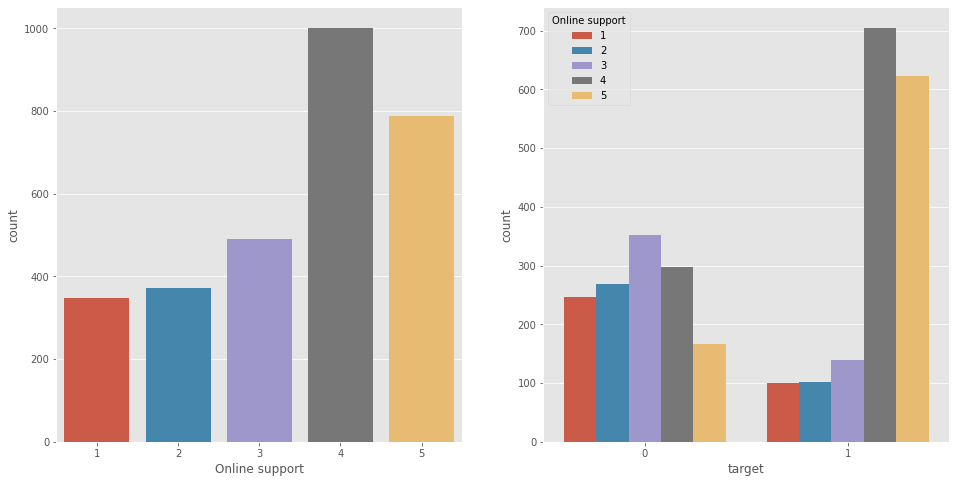

In [19]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Online support", ax=ax[0])
sns.countplot(data=df, x='target', hue='Online support', ax=ax[1])
plt.show()

Online support 에서는 4 > 5 > 3 > 2 > 1 순으로 나타나며,  
1(만족)에서 4,5 의 수가 가장 많고, 
0(불만족)에서는 2,3 뿐만 아니라 0의 수도 많습니다.  

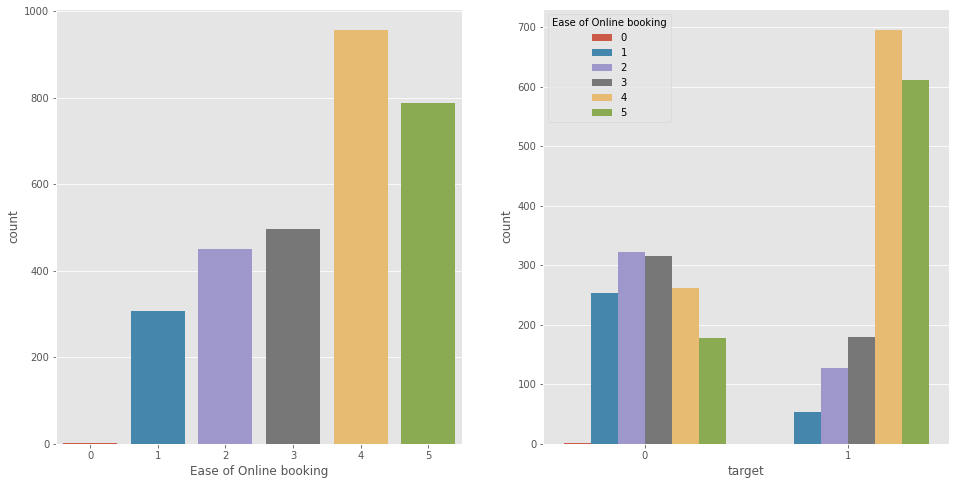

In [20]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Ease of Online booking", ax=ax[0])
sns.countplot(data=df, x='target', hue='Ease of Online booking', ax=ax[1])
plt.show()

Ease of Online booking 에서는 Online support의 모습과 비슷하게 나타났습니다.  

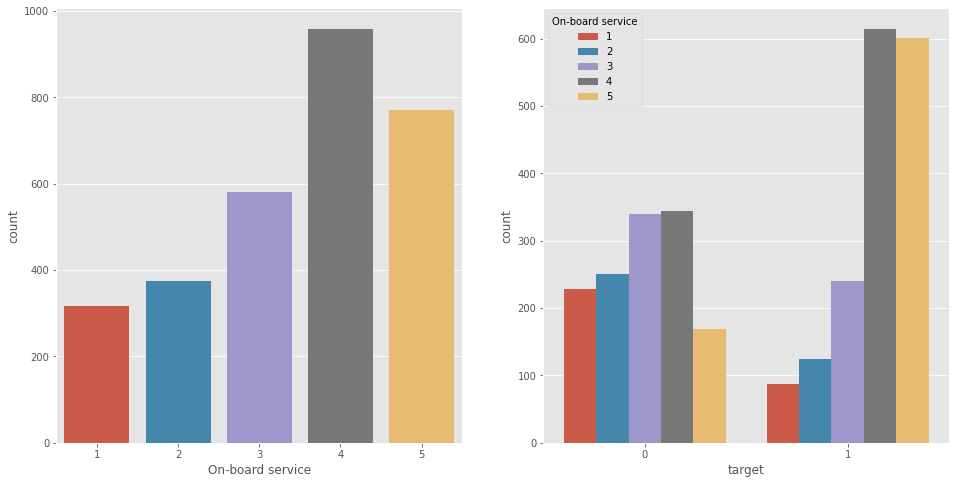

In [21]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "On-board service", ax=ax[0])
sns.countplot(data=df, x='target', hue='On-board service', ax=ax[1])
plt.show()

On-board service 에서는 4 > 5 > 3 > 2 > 1 순으로 나타났으며,  
1(만족)에서 역시 4,5의 수가 많고,  
0(불만족에서) 3,4의 수가 가장 많으며, 0의수가 높게 나타났습니다.  

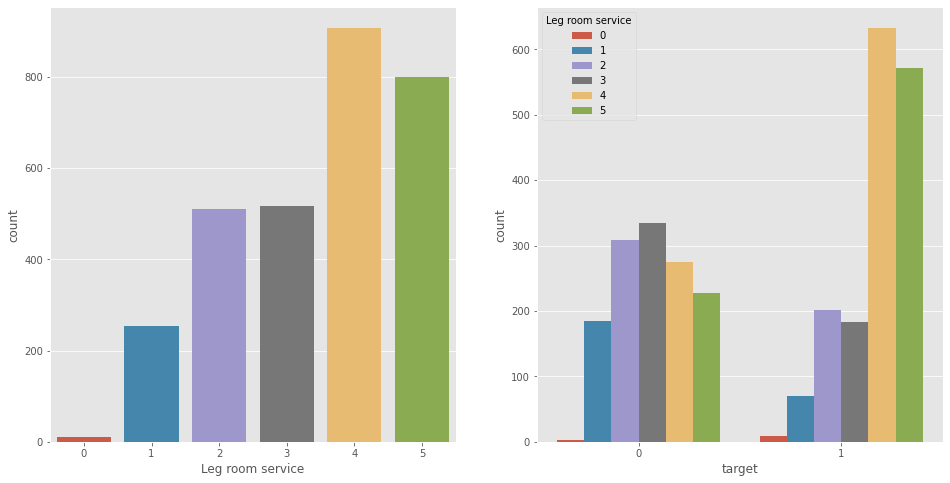

In [22]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Leg room service", ax=ax[0])
sns.countplot(data=df, x='target', hue='Leg room service', ax=ax[1])
plt.show()

Leg room service에서도 역시 위의 만족도들과 비슷한 모습을 보입니다.  

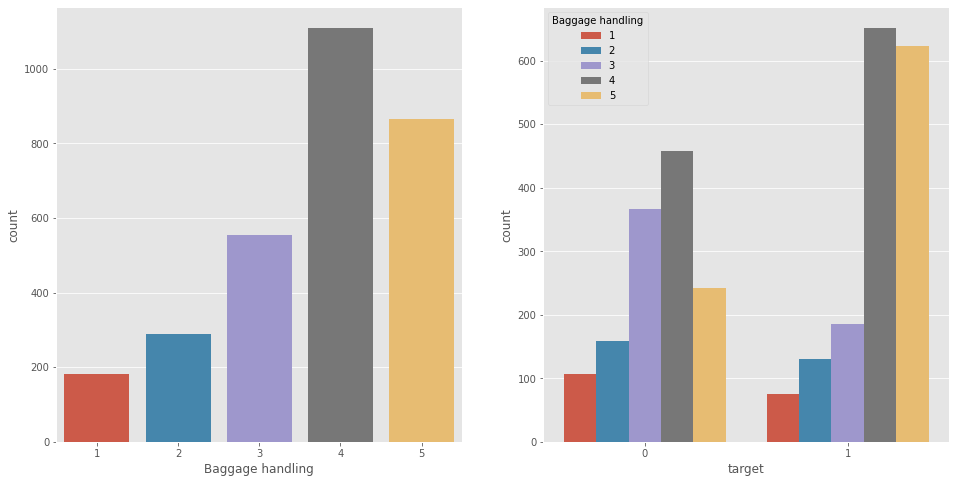

In [23]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Baggage handling", ax=ax[0])
sns.countplot(data=df, x='target', hue='Baggage handling', ax=ax[1])
plt.show()

Checkin service에서도 역시 위의 만족도들과 비슷한 모습을 보입니다.  

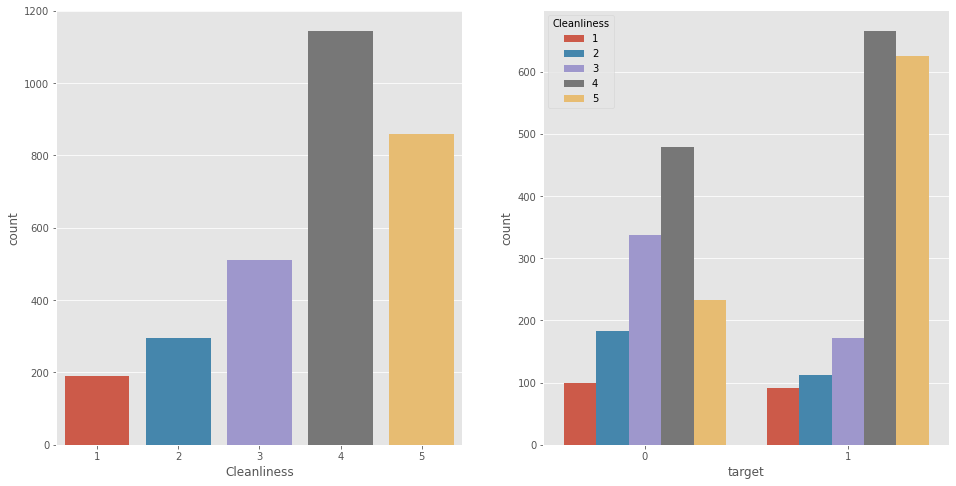

In [24]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Cleanliness", ax=ax[0])
sns.countplot(data=df, x='target', hue='Cleanliness', ax=ax[1])
plt.show()

Cleanliness 에서도 역시 위의 만족도들과 비슷한 모습을 보입니다.  
0(불만족)에서는 4의 만족도가 가장 높다.  
특이한 점은 청결도를 4라는 만족한다라는 긍정의 평가를 줬지만 전체적으로는 0(불만족)을 준 케이스가 높다는 것입니다.  

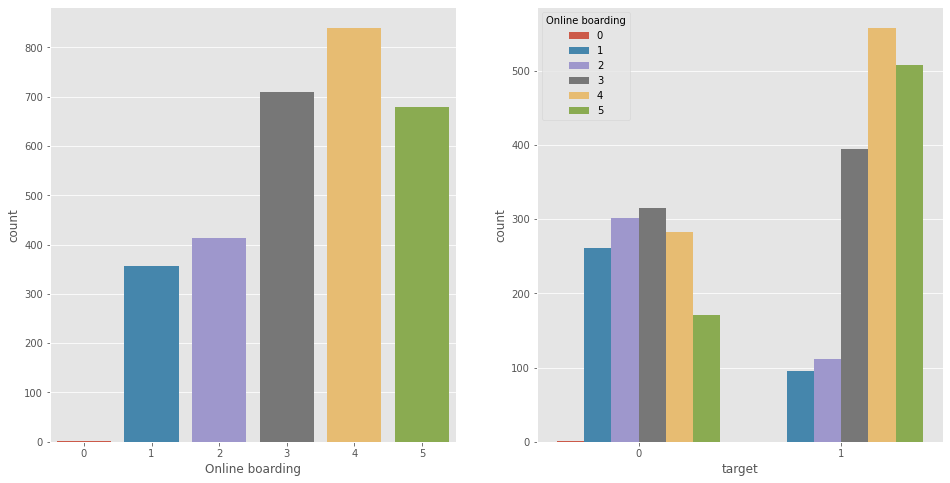

In [25]:
f, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot(data=df, x= "Online boarding", ax=ax[0])
sns.countplot(data=df, x='target', hue='Online boarding', ax=ax[1])
plt.show()

Online boarding 에서는 4 > 3 > 5 > 2 > 1 > 0 순으로 나타났으며,  
1(만족)에서 4 > 5 > 3 으로 높게 나타났습니다.  

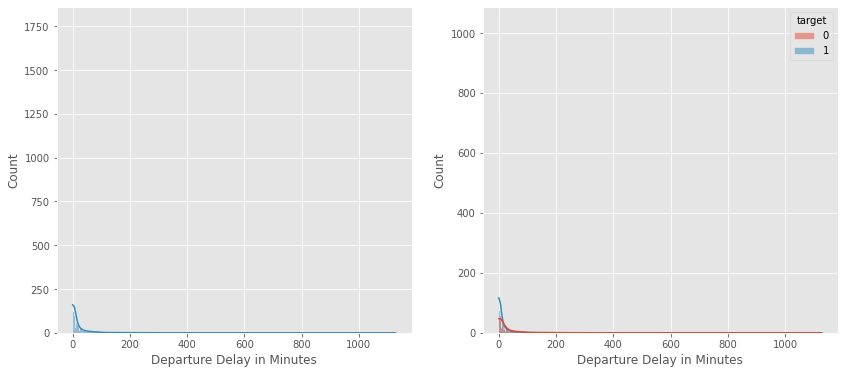

In [26]:
f, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(data=df, x= "Departure Delay in Minutes", kde= True, ax = ax[0])
sns.histplot(data=df, x= "Departure Delay in Minutes", hue="target", kde= True, ax = ax[1])
plt.show()

Departure Delay in Minutes의 0의 값이 가장 높으며 Departure Delay in Minutes 높아질수록 수가 점점 줄어드는 것을 볼 수 있습니다.  

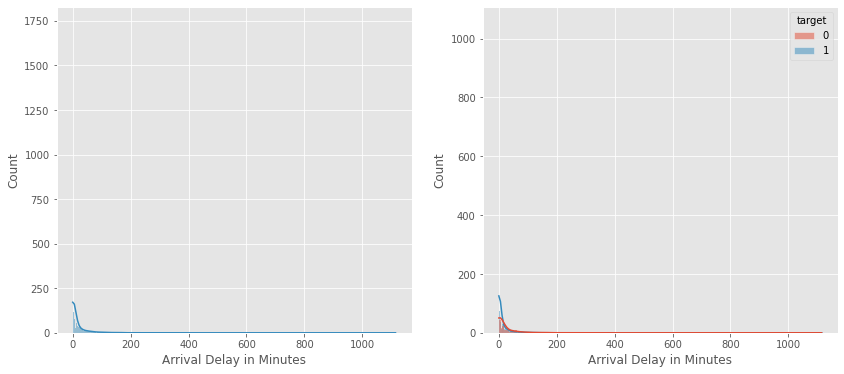

In [27]:
f, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(data=df, x= "Arrival Delay in Minutes", kde= True, ax = ax[0])
sns.histplot(data=df, x= "Arrival Delay in Minutes", hue="target", kde= True, ax = ax[1])
plt.show()

Arrival Delay in Minutes여기 위의 컬럼과 비슷하게 나타납니다.  

전반적으로 만족도를 평가할 때 4,5의 만족한다라는 긍정의 표현을 한 사람들이 1(만족)을 선택하는 경우가 많았고,  
3,4(보통~만족) 부정은 아니지만 긍정도 아닌 그냥 보통이다 라고 평가한 사람들은 0(불만족)을 주는 경우가 많았습니다.  
0(불만족)을 주어도 대체적으로 각각의 만족도에서는 0,1,2 같은 부정의 평가를 주는 사람들이 적었고 대부분 점수를 좋게 준것으로 보입니다.  

출발/도착 지연 시간을 보아도 제시간에 출발/도착했을때 역시 1(만족)을 주는경우도 많았지만 그럼에도 0(불만족)의 평가를 내리는 사람들도 많았습니다.

In [28]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


object형 데이터를 상관관계를 확인하기 위하여 숫자값으로 변경을 해주겠습니다.  

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

columns = ["Gender","Customer Type","Type of Travel", "Class"]
for column in columns:
  df[column] = encoder.fit_transform(df[column])

df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,0,1,22,0,1,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,0,0,37,0,0,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,1,0,46,0,0,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,0,1,24,0,1,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,0,0,58,0,0,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


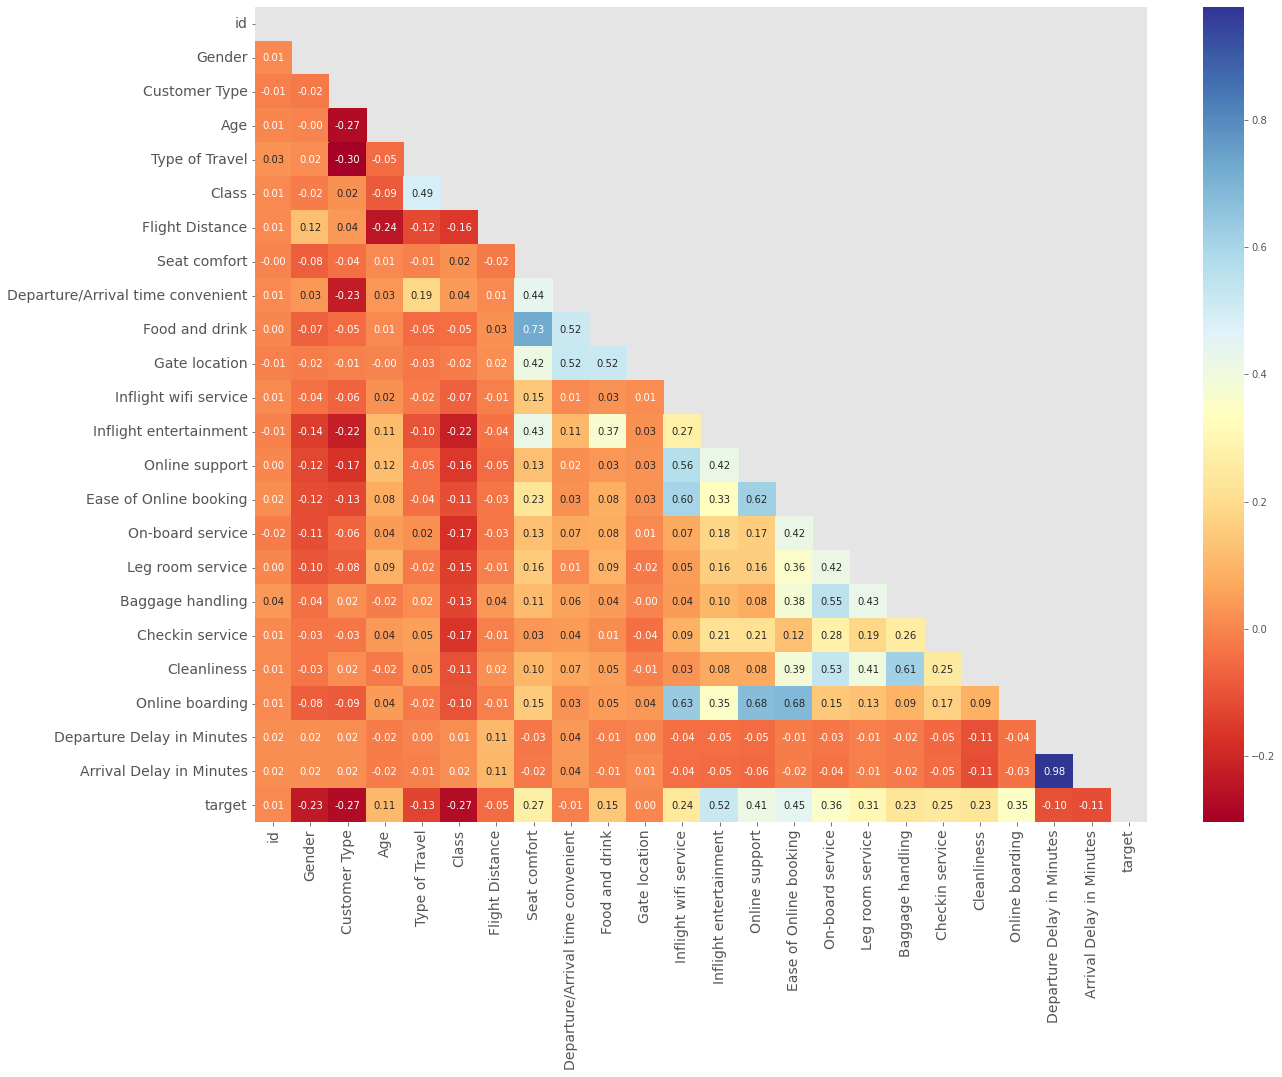

In [30]:

plt.figure(figsize=(20,15))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(corr, annot=True, cmap='RdYlBu',mask=mask,fmt=".2f")
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)
plt.show()

상관관계를 확인해보면 Online support와 Online boarding 0.68 정도로 높은 상관관계를 나타내지만  
Food and Drink와 Seat comfort 0.73, 출발/지연 시간을 뜻하는 Departure/Arrival Delay in Minutes 두 지표의 상관관계가 0.98로 굉장히 높은 것으로 나타났습니다.  

다중공선성으로 보이는데 다중공선성이 나타나는 변수는 예측 성능에 부정적인 영향을 줄 가능성이 높기 때문에  
하나의 지표를 제거해서 사용하는 것이 좋아 보입니다.  
Food and Drink와 Seat comfort에서는 Food and Drink를 제거하고,  
Departure/Arrival Delay in Minutes 두 지표는 평균 지연 시간 컬럼을 생성하고 사용한 두 컬럼은 제거하겠습니다.   

In [31]:
df["Mean Delay in Minutes"] = (df["Departure Delay in Minutes"] + df['Arrival Delay in Minutes']) / 2

# 데이터 전처리

In [32]:
#라벨인코딩 함수
from sklearn.preprocessing import LabelEncoder

def labeling(df):
    encoder = LabelEncoder()
    columns = ["Gender","Customer Type","Type of Travel", "Class"]
    for column in columns:
      df[column] = encoder.fit_transform(df[column])

    return df

In [33]:
def get_mean(df):
  df["Mean Delay in Minutes"] = (df["Departure Delay in Minutes"] + df['Arrival Delay in Minutes']) / 2
  return df

In [34]:
#불필요한 데이터 제거
def drop_columns(df):
  drop_col = ["id", "Departure Delay in Minutes","Arrival Delay in Minutes","Food and drink"]
  df = df.drop(drop_col, axis=1)
  return df

In [35]:
def preprocessing(df):
  df = labeling(df)
  df = get_mean(df)
  df = drop_columns(df)
  return df

In [36]:
#데이터 다시 불러오기
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [37]:
train = preprocessing(train)
test = preprocessing(test)

# 모델학습

In [38]:
#타겟데이터 분리
X = train.drop("target", axis=1)
y = train['target']

In [39]:
#훈련/평가 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("훈련 데이터 세트 크기 : {}".format(X_train.shape))
print("훈련 레이블 세트 크기 : {}".format(y_train.shape))
print("테스트 데이터 세트 크기 : {}".format(X_test.shape))
print("테스트 레이블 세트 크기 : {}".format(y_test.shape))

훈련 데이터 세트 크기 : (2100, 20)
훈련 레이블 세트 크기 : (2100,)
테스트 데이터 세트 크기 : (900, 20)
테스트 레이블 세트 크기 : (900,)


In [40]:
#훈련/평가 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier()
light = LGBMClassifier()

models = [lr, rf, xgb, light]
for model in models:
  model.fit(X_train, y_train)
  predict = model.predict(X_test)
  accuracy = accuracy_score(y_test, predict)
  print(model.__class__.__name__)
  print("accuracy : {:.3f}".format(accuracy))

LogisticRegression
accuracy : 0.822
RandomForestClassifier
accuracy : 0.919
XGBClassifier
accuracy : 0.911
LGBMClassifier
accuracy : 0.929


#하이퍼 파라미터 튜닝

In [44]:
from sklearn.model_selection import GridSearchCV
light = LGBMClassifier(n_estimators = 1000,n_jobs=-1, random_state=42)
params = {
    "num_leaves" : [16,32,64],
    "max_depth" : [64,100, 128],
    "min_child_samples" : [60, 100]
}
grid = GridSearchCV(light, param_grid = params, n_jobs=-1, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(n_estimators=1000, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [64, 100, 128],
                         'min_child_samples': [60, 100],
                         'num_leaves': [16, 32, 64]},
             scoring='accuracy')

In [45]:
grid_best_param = grid.best_params_
best_score = grid.best_score_
best_estimator = grid.best_estimator_

print("grid best params : ",grid_best_param)
print("grid best score : ",best_score)

grid best params :  {'max_depth': 64, 'min_child_samples': 60, 'num_leaves': 16}
grid best score :  0.9142857142857143


In [46]:
#예측
preds = grid.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("accuracy : {:.3f}".format(accuracy))

accuracy : 0.923


#제출

하이퍼 파라미터 튜닝을 한 모델을 사용하여 제출 하겠습니다.

In [48]:
pred = grid.predict(test)
submission = pd.read_csv(sub_path)
submission["target"] = pred
submission.to_csv("light_tunning_model_.csv", index=False)